In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IEOR 4212 Project/Datasets/Training Data for EV Adoption in New England/TrainTest Data/model_creation_data.csv')

In [ ]:
df = pd.read_csv("model_creation_data.csv")
pred_csv = pd.read_csv("model_prediction_data.csv")

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df

,zip_code,Estimate Male Total population AGE Under 5 years,Estimate Male Total population AGE 5 to 9 years,Estimate Male Total population AGE 10 to 14 years,Estimate Male Total population AGE 15 to 19 years,Estimate Male Total population AGE 20 to 24 years,Estimate Male Total population AGE 25 to 29 years,Estimate Male Total population AGE 30 to 34 years,Estimate Male Total population AGE 35 to 39 years,Estimate Male Total population AGE 40 to 44 years,...,Estimate Households Mean income (dollars),Estimate Families Total,Estimate Families Median income (dollars),Estimate Families Mean income (dollars),Estimate Married-couple families Total,Estimate Married-couple families Median income (dollars),Estimate Nonfamily households Total,Estimate Nonfamily households Median income (dollars),Estimate Nonfamily households Mean income (dollars),EVs on the Road
0,10001,675.0,529.0,398.0,390.0,798.0,1642.0,2384.0,1425.0,897.0,...,205444.0,4715,182117.0,269616.0,3291,250000.0,10382,105801.0,175089.0,224
1,10002,1351.0,2027.0,1667.0,1545.0,2155.0,4034.0,3241.0,2999.0,2224.0,...,93314.0,16924,51093.0,98795.0,9848,71682.0,18847,41294.0,87485.0,356
2,10003,895.0,644.0,432.0,2831.0,2566.0,3449.0,3224.0,1946.0,1608.0,...,248577.0,6847,250000.0,416996.0,5896,250000.0,18233,117570.0,184364.0,318
3,10004,153.0,171.0,11.0,9.0,32.0,360.0,452.0,294.0,147.0,...,309645.0,799,250000.0,394971.0,761,250000.0,976,178034.0,238825.0,239
4,10005,56.0,41.0,266.0,0.0,372.0,1133.0,515.0,720.0,315.0,...,279387.0,1432,250000.0,391858.0,1321,250000.0,3724,191394.0,235868.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,14898,41.0,76.0,24.0,63.0,105.0,20.0,15.0,22.0,56.0,...,76715.0,397,59315.0,82616.0,310,84375.0,124,40769.0,47154.0,2
1671,14901,308.0,504.0,476.0,685.0,436.0,624.0,613.0,532.0,561.0,...,52528.0,2743,47849.0,60616.0,1466,70658.0,2807,29564.0,42986.0,42
1672,14903,229.0,163.0,127.0,242.0,102.0,229.0,194.0,191.0,157.0,...,99421.0,1751,80398.0,102963.0,1286,101630.0,1320,47727.0,90075.0,95
1673,14904,312.0,256.0,423.0,460.0,561.0,386.0,788.0,563.0,494.0,...,71472.0,3411,74594.0,85962.0,2103,91635.0,3008,34360.0,50598.0,43


The target column is skewed right as few zipcodes have large amount of EVs on the road. Therefore, we are using random forest to estimat the log value of the number of evs on the road.

In [ ]:
import pandas as pd
import numpy as np

df['EVs on the Road'] = np.log1p(df['EVs on the Road'])

In [ ]:
# Train/Test Split

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = df.sample(frac=1.0,random_state=42) # Shuffle data
train, test = train_test_split(df, test_size=0.3, random_state=42)

y_train = train['EVs on the Road']
y_test = test['EVs on the Road']

X_train = train.iloc[:, 1:-1]
X_test = test.iloc[:, 1:-1]


In [ ]:
X_train

,Estimate Male Total population AGE Under 5 years,Estimate Male Total population AGE 5 to 9 years,Estimate Male Total population AGE 10 to 14 years,Estimate Male Total population AGE 15 to 19 years,Estimate Male Total population AGE 20 to 24 years,Estimate Male Total population AGE 25 to 29 years,Estimate Male Total population AGE 30 to 34 years,Estimate Male Total population AGE 35 to 39 years,Estimate Male Total population AGE 40 to 44 years,Estimate Male Total population AGE 45 to 49 years,...,Estimate Households Median income (dollars),Estimate Households Mean income (dollars),Estimate Families Total,Estimate Families Median income (dollars),Estimate Families Mean income (dollars),Estimate Married-couple families Total,Estimate Married-couple families Median income (dollars),Estimate Nonfamily households Total,Estimate Nonfamily households Median income (dollars),Estimate Nonfamily households Mean income (dollars)
909,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,...,64583.0,78973.0,113,113481.02782,73531.0,111,127023.467845,56,68929.000000,89954.0
1346,292.0,466.0,468.0,309.0,277.0,421.0,629.0,453.0,500.0,470.0,...,103474.0,129776.0,5172,124203.00000,149763.0,4352,137159.000000,1918,50843.000000,72664.0
831,9.0,0.0,61.0,0.0,31.0,0.0,9.0,0.0,53.0,0.0,...,85181.0,80194.0,74,113481.02782,107554.0,23,127023.467845,139,85746.000000,65628.0
112,627.0,552.0,858.0,653.0,145.0,426.0,310.0,661.0,618.0,664.0,...,186555.0,359787.0,5011,250000.00000,440148.0,4478,250000.000000,1704,77500.000000,119117.0
1078,21.0,15.0,7.0,42.0,70.0,48.0,27.0,26.0,23.0,25.0,...,78125.0,86387.0,288,84000.00000,92119.0,192,100441.000000,109,40919.000000,48605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,127.0,53.0,34.0,63.0,67.0,147.0,69.0,27.0,29.0,30.0,...,98750.0,122040.0,423,98345.00000,112494.0,258,119643.000000,60,54029.940274,107997.0
473,635.0,904.0,1371.0,959.0,782.0,661.0,820.0,847.0,776.0,1065.0,...,106810.0,155532.0,6556,113778.00000,170080.0,4742,132558.000000,1930,64279.000000,92899.0
1637,69.0,77.0,119.0,89.0,36.0,29.0,77.0,71.0,70.0,57.0,...,72981.0,90157.0,583,94659.00000,111804.0,504,98977.000000,346,39615.000000,52192.0
1136,74.0,112.0,50.0,46.0,67.0,69.0,160.0,51.0,84.0,88.0,...,68140.0,90374.0,971,85288.00000,100206.0,788,93636.000000,441,45568.000000,64910.0


# Sample Random Forest Model

In [ ]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_features=3, max_samples=0.8, random_state=42)
rf_model.fit(X_train, y_train)

# Train metrics
train_rsquare = rf_model.score(X_train, y_train)
train_pred = rf_model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_pred) ** 0.5

print("train r-square", train_rsquare)
print("train rmse", train_rmse)

# Test metrics
test_rsquare = rf_model.score(X_test, y_test)
test_pred = rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred) ** 0.5

print("test r-square", test_rsquare)
print("test rmse", test_rmse)

train r-square 0.980875674206103
train rmse 0.24429624559383517
test r-square 0.9016985510295458
test rmse 0.5585366110219828


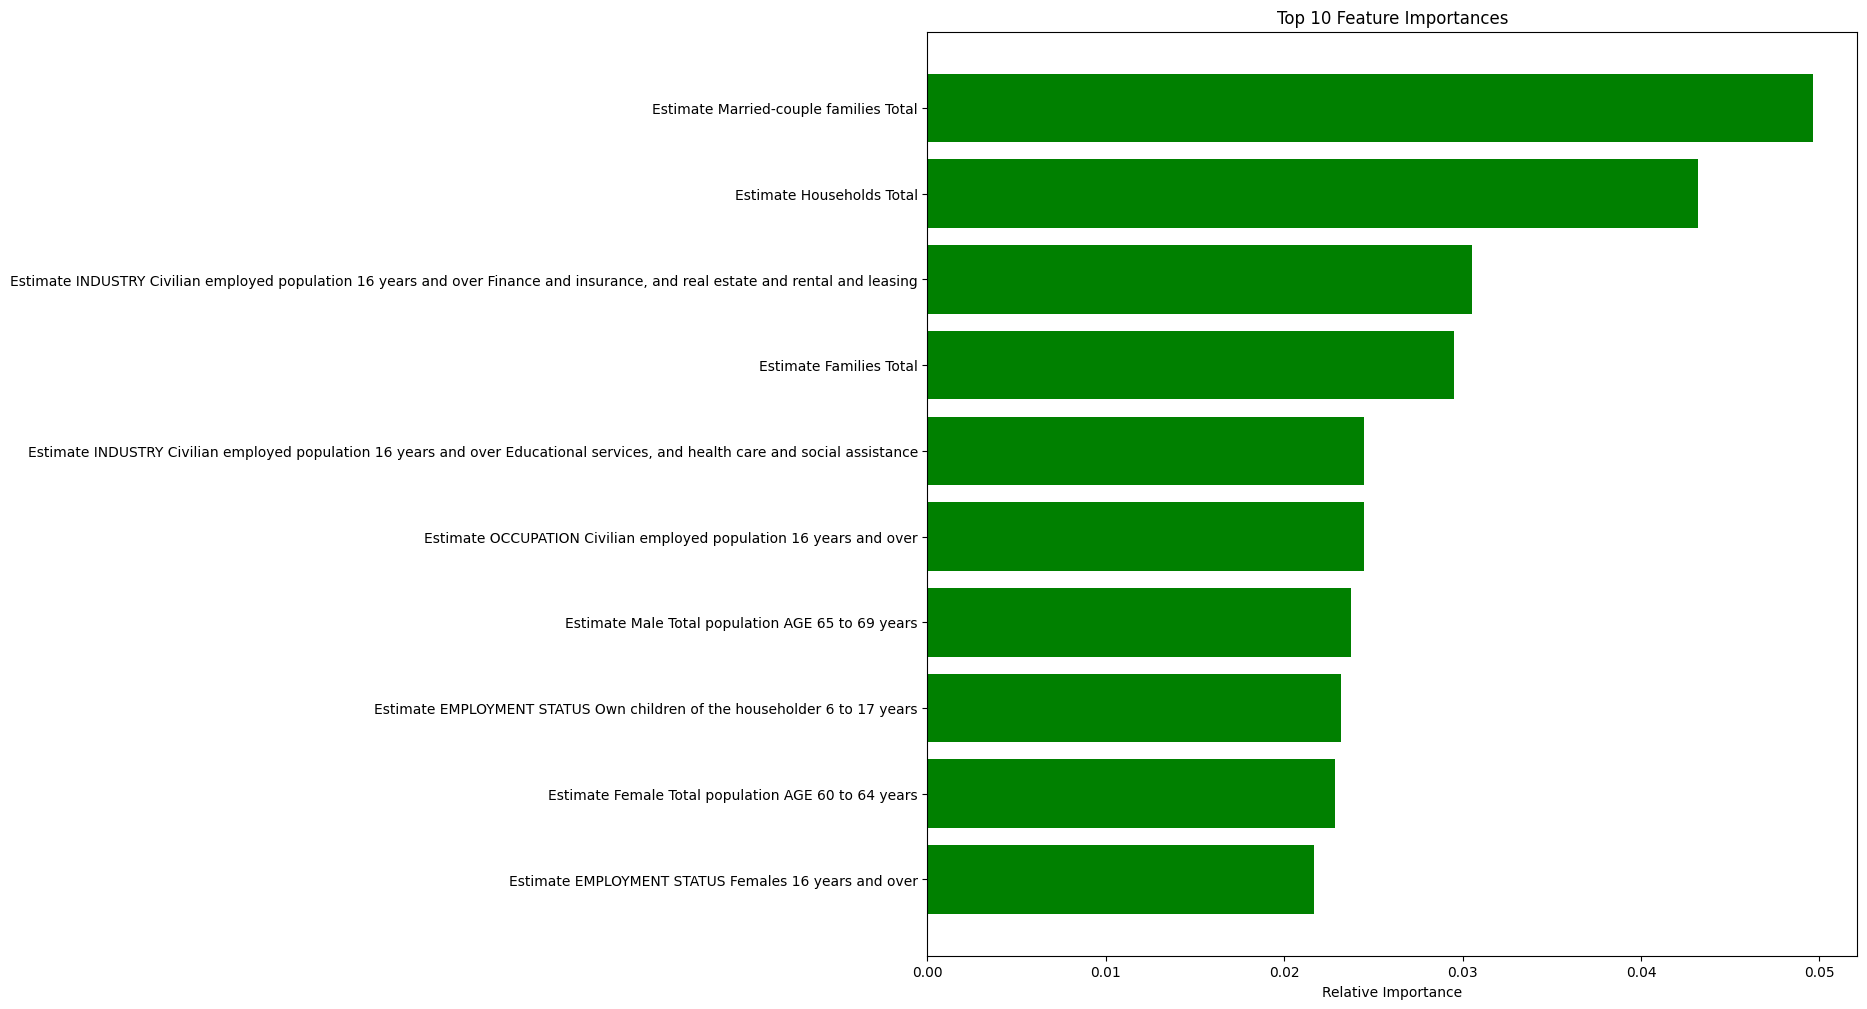

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

labels = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# Top 10 features
top_ten_indices = indices[-10:]

plt.figure(figsize=(12,12))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(top_ten_indices)), importances[top_ten_indices], color='g', align='center')
plt.yticks(range(len(top_ten_indices)), labels[top_ten_indices])
plt.xlabel('Relative Importance')

plt.show()


# Random Forest with Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, max_features=10,
                                 max_samples=0.8, random_state=42)

# Run Cross-Validation for r_squared
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"R_squared scores: {cv_scores}")
print(f"Average R_squared: {cv_scores.mean():.4f}")


R_squared scores: [0.91549037 0.89400674 0.89772339 0.92544611 0.9254394 ]
Average R_squared: 0.9116


In [ ]:
# Run on testing data
rf_model.fit(X_train, y_train)

test_rsquare = rf_model.score(X_test, y_test)
test_pred = rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred) ** 0.5

print(test_rsquare)
print(test_rmse)

0.9073209779115795
0.5229712674670729


## Random Forest Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': [6,8,10,15],
    'max_samples': [0.6, 0.7, 0.8, 0.9]
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'max_features': 15, 'max_samples': 0.9, 'n_estimators': 1000}
Best Score: 0.917131466082847


## Model Post Grid Search
Best Parameters: {'max_features': 15, 'max_samples': 0.9, 'n_estimators': 1000}

In [ ]:
rf_model = RandomForestRegressor(n_estimators=1000, max_features=15,
                                 max_samples=0.9, random_state=42)

# Run Cross-Validation for r_squared
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
print(f"R_squared scores: {cv_scores}")
print(f"Average R_squared: {cv_scores.mean():.4f}")

rf_model.fit(X_train, y_train)

# Test metrics
test_rsquare = rf_model.score(X_test, y_test)
test_pred = rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred) ** 0.5

print("test r-square", test_rsquare)
print("test rmse", test_rmse)

R_squared scores: [0.91783675 0.90073245 0.90218292 0.92580612 0.92775992]
Average R_squared: 0.9149
test r-square 0.9088669363053465
test rmse 0.5185911402939686
